In [1]:
import re
import csv
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import json
from pandas import DataFrame
import matplotlib.pyplot as plt

In [2]:
f = open("../data/jy_move_station_log.csv", "r")

In [3]:
lines = f.read().split("\n") # "\r\n" if needed
df = []

for line in lines:
    if line != "": # add other needed checks to skip titles
        cols = line.split(',')
        x = re.findall('{[^}]+}', line)
        x_json = x[0].replace('""', '"')
print(x_json, ",")

{"testmode":0,"rtkauth":false,"rtkfix":1,"csq":31,"radiochannelno":2,"gga":"0,0,0,0,0,0","reason":"rtkFixChange","rtcmsrc":"","radiohavedata":false,"rtkconn":false,"lastrtcmtime":0,"rtcmexist":false} ,


In [4]:
import editdistance

In [5]:
all_data = pd.read_json('../data/jv_json.json', lines=False, orient='columns')

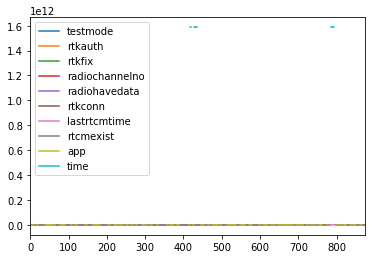

In [6]:
all_data.plot()

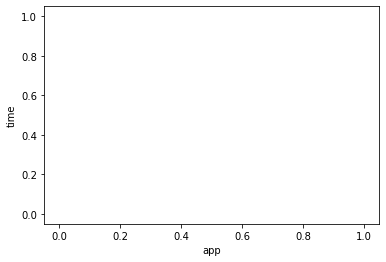

In [20]:
all_data.plot(x ='app', y = 'time', kind = 'scatter')

In [8]:
print(all_data)

     testmode  rtkauth  rtkfix csq  radiochannelno  \
0         0.0      0.0     1.0  26             1.0   
1         NaN      1.0     2.0                 0.0   
2         0.0      1.0     1.0  26             1.0   
3         0.0      1.0     2.0  29             1.0   
4         NaN      1.0     1.0                 0.0   
..        ...      ...     ...  ..             ...   
870       0.0      1.0     1.0  31             1.0   
871       NaN      1.0     2.0                 0.0   
872       NaN      0.0     1.0  18             NaN   
873       NaN      1.0     1.0                 0.0   
874       0.0      0.0     1.0  31             2.0   

                                                   gga            reason  \
0                3452.82301285,N,11317.93662629,E,1,15       connSvrSucc   
1    $GPGGA,082720.020,3450.336118,N,11400.228168,E...      rtkFixChange   
2                3452.82297860,N,11317.93659909,E,1,15  rtkAccountAuthOK   
3                3452.82381100,N,11317.93338893

In [9]:
nan_df = all_data[all_data.isna().any(axis=1)]

In [10]:
display(nan_df.head())

,testmode,rtkauth,rtkfix,csq,radiochannelno,gga,reason,rtcmsrc,radiohavedata,rtkconn,lastrtcmtime,rtcmexist,app,rtktype,time,type1
0,0.0,0.0,1.0,26,1.0,"3452.82301285,N,11317.93662629,E,1,15",connSvrSucc,,0.0,0.0,0.000000e+00,0.0,NaN,NaN,NaN,NaN
1,NaN,1.0,2.0,,0.0,"$GPGGA,082720.020,3450.336118,N,11400.228168,E...",rtkFixChange,net,NaN,1.0,1.587342e+09,1.0,1.0,482,NaN,NaN
2,0.0,1.0,1.0,26,1.0,"3452.82297860,N,11317.93659909,E,1,15",rtkAccountAuthOK,,0.0,1.0,0.000000e+00,0.0,NaN,NaN,NaN,NaN
3,0.0,1.0,2.0,29,1.0,"3452.82381100,N,11317.93338893,E,1,22",rtkFixChange,net,0.0,1.0,1.587342e+09,1.0,NaN,NaN,NaN,NaN
4,NaN,1.0,1.0,,0.0,"$GNGGA,002730.000,3245.909524,N,11422.037599,E...",rtkFixChange,net,NaN,1.0,1.587342e+09,1.0,1.0,906A,NaN,NaN


In [11]:
all_data = all_data.dropna(how='all')

In [12]:
all_data.head()

,testmode,rtkauth,rtkfix,csq,radiochannelno,gga,reason,rtcmsrc,radiohavedata,rtkconn,lastrtcmtime,rtcmexist,app,rtktype,time,type1
0,0.0,0.0,1.0,26,1.0,"3452.82301285,N,11317.93662629,E,1,15",connSvrSucc,,0.0,0.0,0.000000e+00,0.0,NaN,NaN,NaN,NaN
1,NaN,1.0,2.0,,0.0,"$GPGGA,082720.020,3450.336118,N,11400.228168,E...",rtkFixChange,net,NaN,1.0,1.587342e+09,1.0,1.0,482,NaN,NaN
2,0.0,1.0,1.0,26,1.0,"3452.82297860,N,11317.93659909,E,1,15",rtkAccountAuthOK,,0.0,1.0,0.000000e+00,0.0,NaN,NaN,NaN,NaN
3,0.0,1.0,2.0,29,1.0,"3452.82381100,N,11317.93338893,E,1,22",rtkFixChange,net,0.0,1.0,1.587342e+09,1.0,NaN,NaN,NaN,NaN
4,NaN,1.0,1.0,,0.0,"$GNGGA,002730.000,3245.909524,N,11422.037599,E...",rtkFixChange,net,NaN,1.0,1.587342e+09,1.0,1.0,906A,NaN,NaN


In [13]:
all_data = all_data[all_data['csq'].str[0:2]!='Or']

In [14]:
all_data.groupby(['csq']).sum()

,testmode,rtkauth,rtkfix,radiochannelno,radiohavedata,rtkconn,lastrtcmtime,rtcmexist,app,time
csq,,,,,,,,,,
9,0.0,0.0,1.0,2.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
12,0.0,2.0,4.0,3.0,0.0,2.0,1.587344e+09,1.0,0.0,0.0
13,0.0,3.0,6.0,4.0,0.0,3.0,3.174687e+09,2.0,0.0,0.0
14,0.0,3.0,9.0,7.0,0.0,3.0,1.587344e+09,0.0,0.0,0.0
15,0.0,3.0,9.0,7.0,0.0,3.0,3.174687e+09,2.0,0.0,0.0
16,0.0,2.0,9.0,6.0,0.0,2.0,0.000000e+00,0.0,0.0,0.0
17,0.0,7.0,18.0,38.0,0.0,5.0,6.349376e+09,1.0,0.0,0.0
18,0.0,5.0,12.0,8.0,0.0,5.0,4.762032e+09,3.0,0.0,0.0
19,0.0,14.0,37.0,29.0,0.0,14.0,9.524064e+09,6.0,0.0,0.0


In [15]:
keys = [csq for csq, df in all_data.groupby(['csq'])]

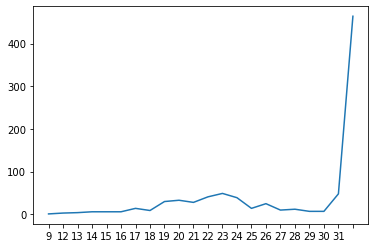

In [16]:
plt.plot(keys, all_data.groupby(['csq']).count()['rtkfix'])

In [17]:
all_data.groupby(['gga']).sum()

,testmode,rtkauth,rtkfix,radiochannelno,radiohavedata,rtkconn,lastrtcmtime,rtcmexist,app,time
gga,,,,,,,,,,
,0.0,0.0,3.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
"$GNGGA,002730.000,3245.909524,N,11422.037599,E,5,18,0.81,50.530,M,0,M,2,2936*57",0.0,1.0,1.0,0.0,0.0,1.0,1.587342e+09,1.0,1.0,0.0
"$GNGGA,002824.000,3245.918612,N,11422.074710,E,4,18,0.81,50.763,M,0,M,2,2936*5A",0.0,1.0,2.0,0.0,0.0,1.0,1.587343e+09,1.0,1.0,0.0
"$GNGGA,003934.000,3404.837327,N,11459.224734,E,1,10,1.19,33.221,M,0,M,,*6D",0.0,1.0,0.0,0.0,0.0,1.0,0.000000e+00,1.0,3.0,0.0
"$GNGGA,003952.000,3245.575449,N,11421.437152,E,5,18,0.80,53.625,M,0,M,1,2936*53",0.0,1.0,1.0,0.0,0.0,1.0,1.587343e+09,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
"4321.88717745,N,12815.70984865,E,4,21",0.0,0.0,2.0,1.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
"4321.88717748,N,12815.70984835,E,4,21",0.0,1.0,2.0,1.0,0.0,1.0,0.000000e+00,0.0,0.0,0.0
"4321.88777516,N,12815.70928525,E,1,18",0.0,0.0,1.0,1.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0


In [18]:
for i in all_data['gga']:
    if len(i) >=6:
        i = i.split(',')[5]
    else:
        pass
    if i == 'E' or i == 'W':
        pass
    else:
        print("satellite_num", i)
    break

satellite_num 15


In [19]:
from ipywidgets import interact
import ipywidgets as widgets
def f1(x):
    return 2*x
interact(f1,x=10)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.f1(x)>